<a href="https://colab.research.google.com/github/Monishraj50/ipl/blob/main/IPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [211]:
import pandas as pd
import numpy as np
import seaborn as sns

In [212]:
train = pd.read_excel('/content/drive/My Drive/ipl.xlsx', sheet_name='Train_Data')
test = pd.read_excel('/content/drive/My Drive/ipl.xlsx',sheet_name='Test_Data')

In [213]:
print(train.shape)
print(test.shape)

(100, 14)
(100, 13)


In [214]:
train.isnull().sum(axis=0)

PLAYER       0
Mat          0
Inns         0
NO           0
2018_Runs    0
HS           0
Avg          0
BF           0
SR           0
100          0
50           0
4s           0
6s           0
2019_Runs    0
dtype: int64

In [215]:
train.dtypes

PLAYER        object
Mat            int64
Inns           int64
NO             int64
2018_Runs      int64
HS            object
Avg           object
BF             int64
SR           float64
100            int64
50             int64
4s             int64
6s             int64
2019_Runs      int64
dtype: object

In [216]:
test.dtypes

PLAYER        object
Mat            int64
Inns           int64
NO             int64
2019_Runs      int64
HS            object
Avg           object
BF             int64
SR           float64
100            int64
50             int64
4s             int64
6s             int64
dtype: object

In [217]:
for i in range(train.shape[0]):
  if str(train['HS'][i])[-1]=='*':
    train.loc[i,'HS']=train['HS'][i][:-1]

In [218]:
train['HS']=train['HS'].astype('int')

In [219]:
for i in range(train.shape[0]):
  try:
    l=float(train['Avg'][i])
  except (IOError,SyntaxError,ValueError) as e:
    print('{} Error'.format(i))  

44 Error
57 Error
81 Error


In [220]:
train['Avg']=train['Avg'].replace('-',np.nan)

In [221]:
train.isnull().sum(axis=0)

PLAYER       0
Mat          0
Inns         0
NO           0
2018_Runs    0
HS           0
Avg          3
BF           0
SR           0
100          0
50           0
4s           0
6s           0
2019_Runs    0
dtype: int64

In [222]:
train=train.dropna(axis=0)

In [223]:
train.shape

(97, 14)

In [224]:
train.dtypes

PLAYER        object
Mat            int64
Inns           int64
NO             int64
2018_Runs      int64
HS             int64
Avg          float64
BF             int64
SR           float64
100            int64
50             int64
4s             int64
6s             int64
2019_Runs      int64
dtype: object

In [225]:
train.describe()

,Mat,Inns,NO,2018_Runs,HS,Avg,BF,SR,100,50,4s,6s,2019_Runs
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,10.536082,8.824742,1.804124,194.546392,48.350515,25.126289,139.701031,131.563505,0.051546,1.041237,16.835052,8.927835,189.587629
std,4.406581,4.455826,1.705623,182.724122,27.877351,14.870974,122.992476,28.738455,0.265013,1.657794,17.944173,9.417678,173.258823
min,2.000000,2.000000,0.000000,13.000000,7.000000,3.000000,12.000000,71.420000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,6.000000,4.000000,1.000000,52.000000,27.000000,13.750000,40.000000,115.940000,0.000000,0.000000,3.000000,1.000000,40.000000
50%,11.000000,8.000000,1.000000,122.000000,45.000000,22.800000,91.000000,132.580000,0.000000,0.000000,9.000000,6.000000,115.000000
75%,14.000000,13.000000,3.000000,286.000000,65.000000,32.400000,200.000000,149.450000,0.000000,1.000000,24.000000,12.000000,342.000000
max,17.000000,17.000000,9.000000,735.000000,128.000000,75.830000,516.000000,196.870000,2.000000,8.000000,68.000000,37.000000,692.000000


In [226]:
train.info

<bound method DataFrame.info of                PLAYER  Mat  Inns  NO  2018_Runs  ...  100  50  4s  6s  2019_Runs
0         Aaron Finch   10     9   1        134  ...    0   0   6   8        160
1      AB de Villiers   12    11   2        480  ...    0   6  39  30        424
2     Abhishek Sharma    3     3   2         63  ...    0   0   3   5         63
3      Ajinkya Rahane   15    14   1        370  ...    0   1  39   5        396
4          Alex Hales    6     6   0        148  ...    0   0  13   6        165
..                ...  ...   ...  ..        ...  ...  ...  ..  ..  ..        ...
95        Virat Kohli   14    14   3        530  ...    0   4  52  18        488
96  Washington Sundar    7     6   3         65  ...    0   0   5   4         64
97    Wriddhiman Saha   11    10   2        122  ...    0   0  17   1        115
98       Yusuf Pathan   15    13   4        260  ...    0   0  22  11        296
99       Yuvraj Singh    8     6   0         65  ...    0   0   6   2        

In [227]:
train.drop(['PLAYER'],axis=1,inplace=True)

In [228]:
train.head()

,Mat,Inns,NO,2018_Runs,HS,Avg,BF,SR,100,50,4s,6s,2019_Runs
0,10,9,1,134,46,16.75,100,134.00,0,0,6,8,160
1,12,11,2,480,90,53.33,275,174.54,0,6,39,30,424
2,3,3,2,63,46,63.00,33,190.90,0,0,3,5,63
3,15,14,1,370,65,28.46,313,118.21,0,1,39,5,396
4,6,6,0,148,45,24.66,118,125.42,0,0,13,6,165


In [229]:
train=train.sort_values('2018_Runs',axis=0,ascending=False)

In [230]:
train.head()

,Mat,Inns,NO,2018_Runs,HS,Avg,BF,SR,100,50,4s,6s,2019_Runs
42,17,17,3,735,84,52.50,516,142.44,0,8,64,28,692
73,14,14,1,684,128,52.61,394,173.60,1,5,68,37,593
46,14,14,2,659,95,54.91,416,158.41,0,6,66,32,529
5,16,16,2,602,100,43.00,402,149.75,1,3,53,34,521
80,15,15,1,555,117,39.64,359,154.59,2,2,44,35,510


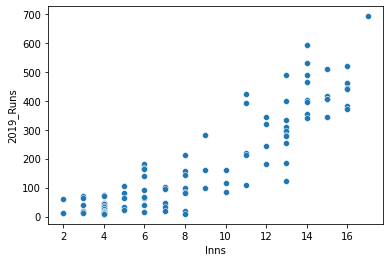

In [231]:
sns.scatterplot(x='Inns',y='2019_Runs',data=train)

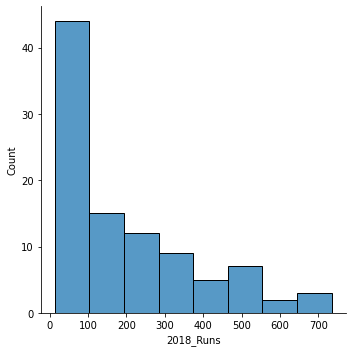

In [232]:
sns.displot(data=train,x='2018_Runs')

In [233]:
train[train.columns].corr()

,Mat,Inns,NO,2018_Runs,HS,Avg,BF,SR,100,50,4s,6s,2019_Runs
Mat,1.000000,0.833501,0.427126,0.624641,0.456607,0.235601,0.631822,0.227750,0.163409,0.464645,0.579845,0.556166,0.650332
Inns,0.833501,1.000000,0.331238,0.854077,0.702818,0.443015,0.865252,0.343782,0.237084,0.648254,0.804764,0.754815,0.888521
NO,0.427126,0.331238,1.000000,0.189857,0.095881,0.435336,0.177733,0.138880,-0.046565,0.139193,0.094231,0.178094,0.189189
2018_Runs,0.624641,0.854077,0.189857,1.000000,0.855607,0.689465,0.987251,0.397633,0.385324,0.892284,0.965393,0.897170,0.987099
HS,0.456607,0.702818,0.095881,0.855607,1.000000,0.676974,0.825975,0.534405,0.457179,0.783387,0.796991,0.851238,0.859488
Avg,0.235601,0.443015,0.435336,0.689465,0.676974,1.000000,0.652837,0.542230,0.238250,0.656375,0.614654,0.669347,0.667500
BF,0.631822,0.865252,0.177733,0.987251,0.825975,0.652837,1.000000,0.307166,0.341153,0.873565,0.959996,0.837925,0.981193
SR,0.227750,0.343782,0.138880,0.397633,0.534405,0.542230,0.307166,1.000000,0.165142,0.310039,0.338695,0.531747,0.410109
100,0.163409,0.237084,-0.046565,0.385324,0.457179,0.238250,0.341153,0.165142,1.000000,0.232211,0.339139,0.514867,0.358233
50,0.464645,0.648254,0.139193,0.892284,0.783387,0.656375,0.873565,0.310039,0.232211,1.000000,0.870395,0.778812,0.857140


In [234]:
train = train.drop(['Avg','SR'],axis=1)

In [235]:
X = train.iloc[:,:-1]

In [236]:
Y = train.iloc[:,-1]

In [237]:
Y

42    692
73    593
46    529
5     521
80    510
     ... 
17     12
20     11
39      9
11      9
83      9
Name: 2019_Runs, Length: 97, dtype: int64

In [238]:
from sklearn.preprocessing import StandardScaler

In [239]:
scaler=StandardScaler()
data_scaled = scaler.fit_transform(X)

In [240]:
data_scaled

array([[ 1.47449841e+00,  1.84426584e+00,  7.04779863e-01,
         2.97312240e+00,  1.28544057e+00,  3.07542211e+00,
        -1.95515472e-01,  4.21940933e+00,  2.64208125e+00,
         2.03566551e+00],
       [ 7.90161827e-01,  1.16749238e+00, -4.73903701e-01,
         2.69256318e+00,  2.87198203e+00,  2.07833860e+00,
         3.59748468e+00,  2.40037509e+00,  2.86615284e+00,
         2.99627955e+00],
       [ 7.90161827e-01,  1.16749238e+00,  1.15438081e-01,
         2.55503415e+00,  1.68207594e+00,  2.25814055e+00,
        -1.95515472e-01,  3.00671984e+00,  2.75411704e+00,
         2.46260508e+00],
       [ 1.24638622e+00,  1.61867469e+00,  1.15438081e-01,
         2.24146796e+00,  1.86236474e+00,  2.14372113e+00,
         3.59748468e+00,  1.18768559e+00,  2.02588438e+00,
         2.67607487e+00],
       [ 1.01827402e+00,  1.39308353e+00, -4.73903701e-01,
         1.98291339e+00,  2.47534667e+00,  1.79229005e+00,
         7.39048483e+00,  5.81340842e-01,  1.52172330e+00,
         2.

In [241]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)

In [242]:
pca.fit(data_scaled)
pcad = pca.transform(data_scaled)

In [243]:
print(pca.explained_variance_ratio_)

[0.67036152 0.13086429 0.08388254 0.05301066 0.02366089]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


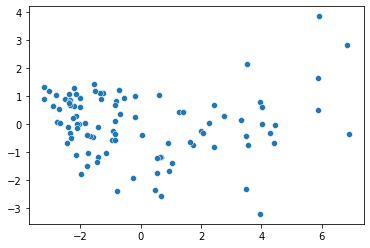

In [244]:
sns.scatterplot(pcad[:,0],pcad[:,1])

In [245]:
X_new = pd.DataFrame(data_scaled,columns=X.columns)

In [246]:
Y_new = pd.DataFrame(Y)

In [247]:
Y_new

,2019_Runs
42,692
73,593
46,529
5,521
80,510
...,...
17,12
20,11
39,9
11,9


In [248]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_new,Y_new,test_size=0.3,random_state=1234)

In [249]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.05)

In [250]:
ridge.fit(X_train,Y_train)

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [251]:
ridge.score(X_train,Y_train)

0.9850333884421629

In [252]:
ridge.score(X_test,Y_test)

0.9863194263319632

In [253]:
test_data = test.copy()

In [254]:
test = test.drop(columns=['PLAYER','Avg','SR'],axis=1)

In [255]:
test.dtypes

Mat           int64
Inns          int64
NO            int64
2019_Runs     int64
HS           object
BF            int64
100           int64
50            int64
4s            int64
6s            int64
dtype: object

In [256]:
for i in range(test.shape[0]):
  if str(test['HS'][i])[-1]=='*':
    test.loc[i,'HS']=test['HS'][i][:-1]

In [257]:
test['HS']=test['HS'].astype('int')

In [258]:
test

,Mat,Inns,NO,2019_Runs,HS,BF,100,50,4s,6s
0,12,12,2,692,100,481,1,8,57,21
1,14,14,3,593,100,438,1,6,49,25
2,16,16,1,529,81,398,0,4,45,25
3,16,16,1,521,97,384,0,5,64,11
4,14,13,4,510,80,249,0,4,31,52
...,...,...,...,...,...,...,...,...,...,...
95,2,2,0,11,6,10,0,0,1,0
96,13,3,3,10,10,3,0,0,1,1
97,3,1,0,9,9,10,0,0,0,0
98,7,4,0,9,5,12,0,0,1,0


In [259]:
test_data_scaled = scaler.fit_transform(test)

In [260]:
test_data_scaled

array([[ 4.20866032e-01,  7.92199502e-01,  8.71007113e-02,
         2.94443460e+00,  1.68573558e+00,  2.80934576e+00,
         3.95811403e+00,  4.37491513e+00,  2.42026832e+00,
         1.46311199e+00],
       [ 8.52523501e-01,  1.21470590e+00,  6.31480157e-01,
         2.37032379e+00,  1.68573558e+00,  2.45859558e+00,
         3.95811403e+00,  3.11413267e+00,  1.94289784e+00,
         1.90715205e+00],
       [ 1.28418097e+00,  1.63721230e+00, -4.57278734e-01,
         1.99918144e+00,  1.07542735e+00,  2.13231635e+00,
        -2.52645576e-01,  1.85335021e+00,  1.70421260e+00,
         1.90715205e+00],
       [ 1.28418097e+00,  1.63721230e+00, -4.57278734e-01,
         1.95278865e+00,  1.58937112e+00,  2.01811862e+00,
        -2.52645576e-01,  2.48374144e+00,  2.83796748e+00,
         3.53011847e-01],
       [ 8.52523501e-01,  1.00345270e+00,  1.17585960e+00,
         1.88899856e+00,  1.04330586e+00,  9.16926211e-01,
        -2.52645576e-01,  1.85335021e+00,  8.68814268e-01,
         4.

In [261]:
X_new_predict = pd.DataFrame(test_data_scaled,columns=X.columns)

In [262]:
Y_hat = ridge.predict(X_new_predict)

In [263]:
Y_hat=Y_hat.astype('int')

In [264]:
Y_hat = pd.DataFrame(Y_hat,columns=['2020_Runs'])

In [273]:
test_data.shape

(100, 13)

In [270]:
Y_hat

,2020_Runs
0,583
1,546
2,541
3,509
4,488
...,...
95,0
96,-2
97,-5
98,10


In [274]:
final = pd.concat([test_data,Y_hat],ignore_index=True,axis=1)

In [275]:
final

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,David Warner,12,12,2,692,100*,69.2,481,143.86,1,8,57,21,583
1,KL Rahul,14,14,3,593,100*,53.9,438,135.38,1,6,49,25,546
2,Quinton de Kock,16,16,1,529,81,35.26,398,132.91,0,4,45,25,541
3,Shikhar Dhawan,16,16,1,521,97*,34.73,384,135.67,0,5,64,11,509
4,Andre Russell,14,13,4,510,80*,56.66,249,204.81,0,4,31,52,488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Carlos Brathwaite,2,2,0,11,6,5.5,10,110.00,0,0,1,0,0
96,Ishant Sharma,13,3,3,10,10*,-,3,333.33,0,0,1,1,-2
97,Shakib Al Hasan,3,1,0,9,9,9,10,90.00,0,0,0,0,-5
98,Pawan Negi,7,4,0,9,5,2.25,12,75.00,0,0,1,0,10


In [277]:
 final.to_csv('Final.csv')